In [3]:
pip install osmnx

DEPRECATION: Loading egg at /opt/homebrew/Cellar/gpgme/1.22.0/lib/python3.11/site-packages/gpg-1.22.0-py3.11-macosx-12-arm64.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

DEPRECATION: Loading egg at /opt/homebrew/Cellar/gpgme/1.22.0/lib/python3.11/site-packages/gpg-1.22.0-py3.11-macosx-12-arm64.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
Note: you may need to restart the kernel to use updated packages.


In [5]:
import osmnx as ox
import matplotlib.pyplot as plt


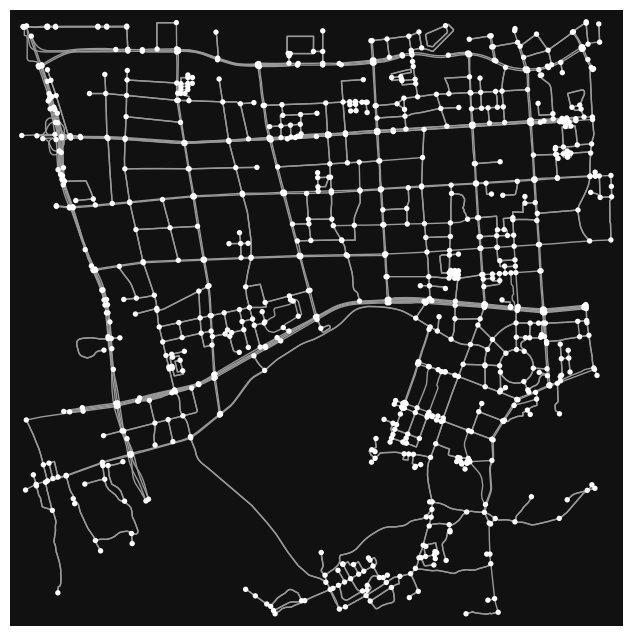

In [27]:
place_name = "Gudang, Hangzhou, China"

# fetch OSM street network (drive, walk, private, etc.) from the location
graph = ox.graph_from_address(place_name, network_type='drive', dist=3000)
fig, ax = ox.plot_graph(graph)

In [41]:
nodes, edges = ox.graph_to_gdfs(graph)

# Filter nodes that have the 'highway' attribute set to 'traffic_signals'
traffic_lights = nodes[nodes['highway'] == 'traffic_signals']
print(traffic_lights)

# print(traffic_lights['geometry'])


                     y           x          highway  street_count  \
osmid                                                               
25954992     30.273938  120.136242  traffic_signals             4   
25954993     30.268230  120.137076  traffic_signals             4   
25982050     30.265372  120.128957  traffic_signals             4   
25982051     30.261735  120.126307  traffic_signals             4   
25982066     30.273591  120.131682  traffic_signals             4   
...                ...         ...              ...           ...   
5398372957   30.266693  120.132436  traffic_signals             4   
6004515436   30.274459  120.115295  traffic_signals             4   
8881860194   30.274133  120.119323  traffic_signals             4   
11065317836  30.274169  120.115476  traffic_signals             5   
11112434618  30.274542  120.119768  traffic_signals             4   

                               geometry  
osmid                                    
25954992     POINT

highway
residential                    750
tertiary                       358
secondary                      348
primary                        301
unclassified                   285
trunk_link                      44
trunk                           34
secondary_link                  12
road                             8
[tertiary, residential]          2
tertiary_link                    2
[unclassified, residential]      2
primary_link                     2
Name: count, dtype: int64
Index(['osmid', 'lanes', 'name', 'highway', 'oneway', 'reversed', 'length',
       'geometry', 'maxspeed', 'bridge', 'width', 'tunnel'],
      dtype='object')


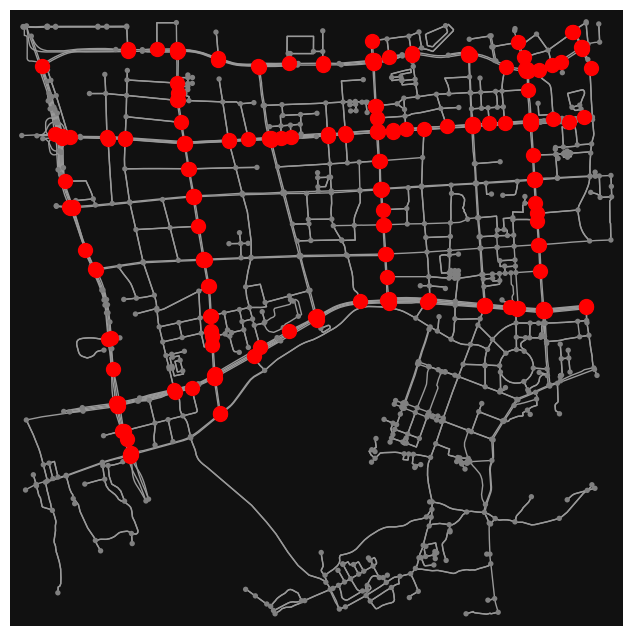

In [50]:
print(edges['highway'].value_counts())
print(edges.columns)

# Get all the edges that are trunk roads
trunk_edges = [(u, v, k, d) for u, v, k, d in graph.edges(keys=True, data=True) if d['highway'] == 'primary']

# Extract nodes from these edges
trunk_nodes = set()
for u, v, k, d in trunk_edges:
    trunk_nodes.add(u)
    trunk_nodes.add(v)

# Filter out nodes that are not intersections
intersection_nodes = [node for node in trunk_nodes if graph.degree(node) >= 4]

# Plot the graph and highlight the intersection nodes
fig, ax = ox.plot_graph(graph, node_color='gray', show=False, close=False)
ax.scatter(nodes.loc[intersection_nodes]['x'], nodes.loc[intersection_nodes]['y'], color='red', s=100)
plt.show()


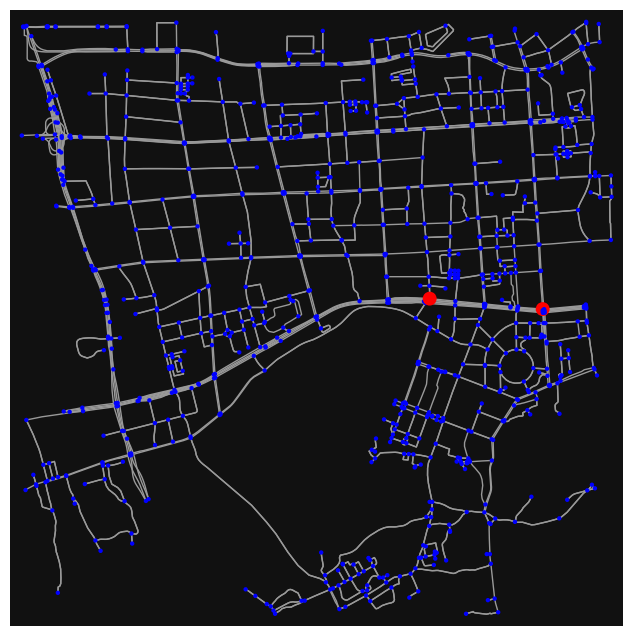

In [38]:
# Suppose the node IDs of the two nodes you want to highlight are 1234567890 and 9876543210
node1_id = 25982066
node2_id = 11112434618

# Create a list of node colors: default color for most nodes and a special color for the highlighted nodes
nc = ['r' if node == node1_id or node == node2_id else 'b' for node in graph.nodes()]

# Create a list of node sizes: larger size for the highlighted nodes and default size for the rest
ns = [100 if node == node1_id or node == node2_id else 10 for node in graph.nodes()]

# Plot the graph with the specified node colors and sizes
fig, ax = ox.plot_graph(graph, node_color=nc, node_size=ns)